In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Downloading and Loading Data


Downloading

In [ ]:
# We added a link to manually download it if you want Ze'ev
#https://drive.google.com/file/d/15XjQCzg9QnOMQcfDXTDX0SLBkE1srWRV/view?usp=sharing

In [ ]:
# this downloads the file right into the notebook, use this always
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15XjQCzg9QnOMQcfDXTDX0SLBkE1srWRV' -O movie_metadata.csv

--2020-06-24 21:48:27--  https://docs.google.com/uc?export=download&id=15XjQCzg9QnOMQcfDXTDX0SLBkE1srWRV
Resolving docs.google.com (docs.google.com)... 64.233.184.102, 64.233.184.100, 64.233.184.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/prv4bbjjjit0vbm386koc5m2mghndtrd/1593035250000/00361495296812975967/*/15XjQCzg9QnOMQcfDXTDX0SLBkE1srWRV?e=download [following]
--2020-06-24 21:48:28--  https://doc-0s-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/prv4bbjjjit0vbm386koc5m2mghndtrd/1593035250000/00361495296812975967/*/15XjQCzg9QnOMQcfDXTDX0SLBkE1srWRV?e=download
Resolving doc-0s-8g-docs.googleusercontent.com (doc-0s-8g-docs.googleusercontent.com)... 74.125.133.132, 2a00:1450:400c:c07::84
Connecting to doc-0s-8g-docs.googleusercontent.com (doc-0s-8g-d

Loading

In [ ]:
movies = pd.read_csv("/content/movie_metadata.csv")

# Preparing the data

In [ ]:
# Looking at the data columns
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
min(movies['imdb_score'])

1.6

In [ ]:
# Removing some of the columns
movies.drop('color',axis=1,inplace=True)
movies.drop('movie_imdb_link', axis=1, inplace=True)


In [ ]:
# Remove missing values, iterating by rows not columns

movies.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name','movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords','num_user_for_reviews','language', 'country',
       'title_year', 'actor_2_facebook_likes','imdb_score', 'movie_facebook_likes', 'content_rating','aspect_ratio', 'budget','gross' ],inplace=True)


More data cleaning, removing null values

In [ ]:
movies.isna().sum()  # check that there is no null values


director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#check if the gross isn't equal to 0
cnt = 0
for x in movies['gross']:
  if x == 0 :
    cnt += 1
cnt

0

In [ ]:
movies.drop('language',axis=1,inplace=True)


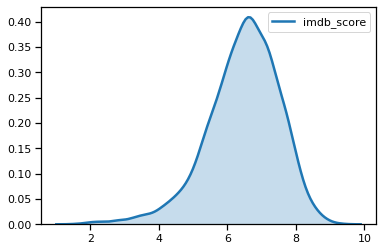

In [ ]:
import seaborn as sns
sns.kdeplot(movies.imdb_score, shade=True, legend = True)

# Analyzing and Visualization the data

We can see the most of the movies which are released after 1980

Text(0, 0.5, 'Num of Movies')

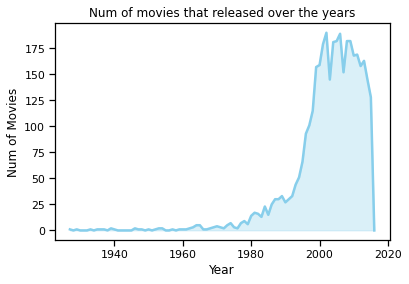

In [ ]:
#Checking for the movies released year wise 
import numpy as np
import matplotlib.pyplot as plt

x = range(int(min(movies.title_year)), int(max(movies.title_year)+1))
years = []
y_count = [0]*((int(max(movies.title_year)) - (int(min(movies.title_year))))+1)
for m_year in movies.title_year:
   years.append(m_year) 
j = 0
for i in range(int(min(movies.title_year)), int(max(movies.title_year))):
       y_count[j] = years.count(float(i))
       j += 1

plt.fill_between(x,y_count, color="skyblue", alpha=0.3)
plt.plot(x,y_count, color="skyblue")
 
# Add titles
plt.title("Num of movies that released over the years", loc="center")
plt.xlabel("Year")
plt.ylabel("Num of Movies")




Relationship between the imdb score and the profit made by the movie <br>
We can see that there is strong corelation between the imdb_score and the profit .

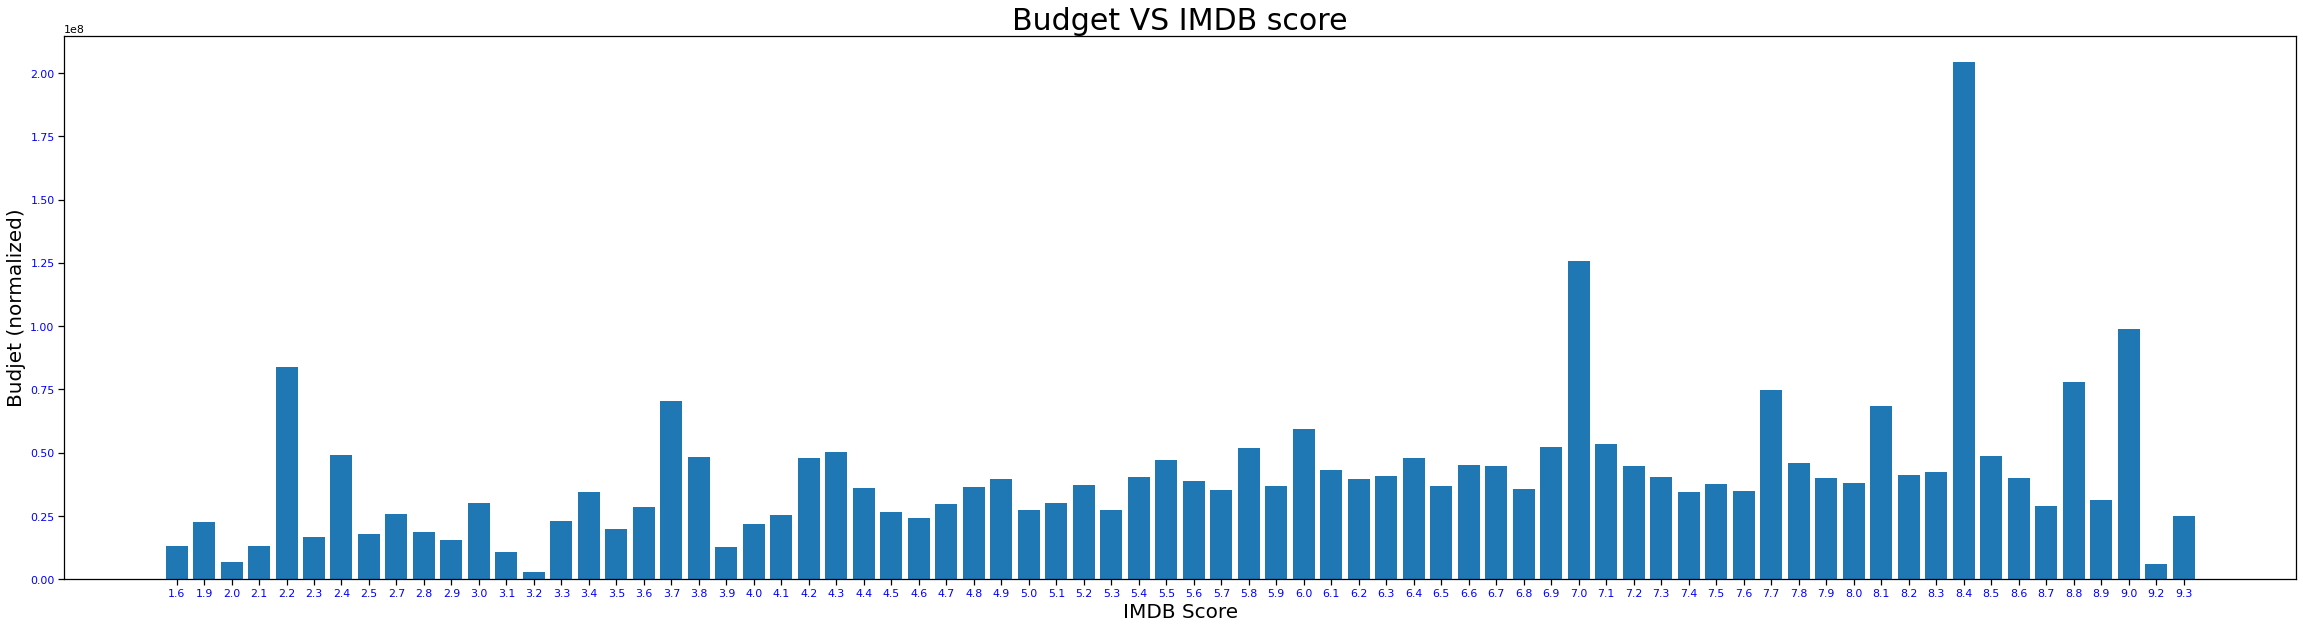

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

groupby_score = movies.groupby('imdb_score').mean()

plt.figure(figsize=(40,10))

# Choose the height of the bars
height = [int(mean_budget) for mean_budget in groupby_score.budget]

# Choose the names of the bars
bars = (str(score) for score in groupby_score.index)
y_pos = np.arange(len(groupby_score.index))
 
# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Budget VS IMDB score', fontdict = {'fontsize' : 30})
plt.xlabel('IMDB Score', fontdict = {'fontsize' : 20})
plt.ylabel('Budjet (normalized)', fontdict = {'fontsize' : 20})


# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()

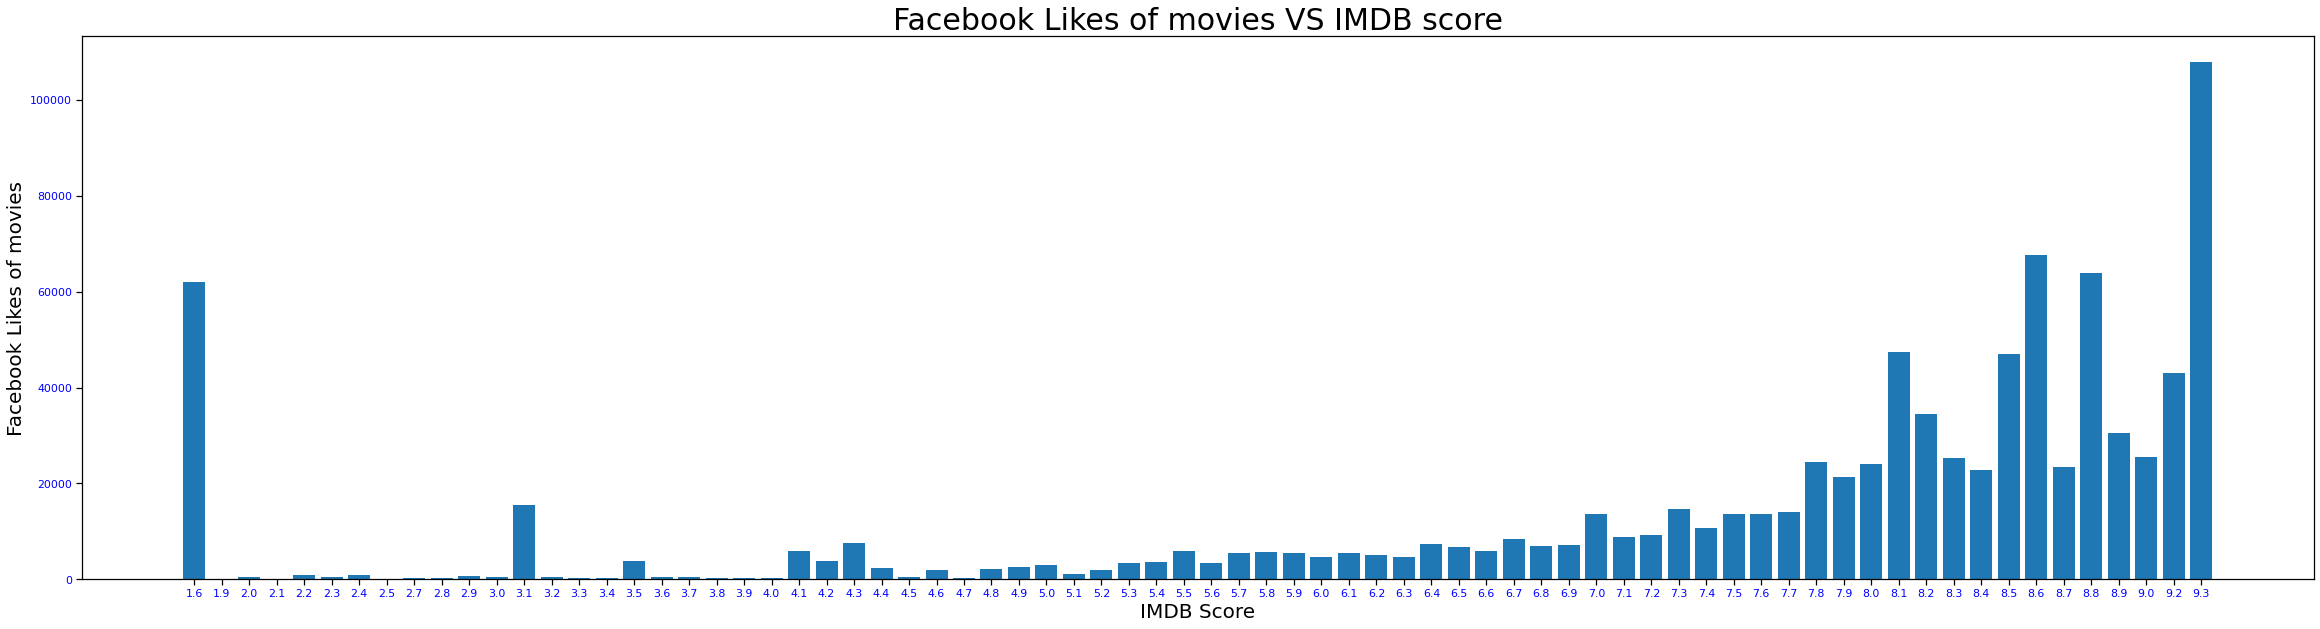

In [ ]:
#Checking the relationship between the movies' likes to the IMDB score they received

plt.figure(figsize=(40,10))

# Choose the height of the bars
height = [int(mean_likes) for mean_likes in groupby_score.movie_facebook_likes]

# Choose the names of the bars
bars = (str(score) for score in groupby_score.index)
y_pos = np.arange(len(groupby_score.index))
 
# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Facebook Likes of movies VS IMDB score', fontdict = {'fontsize' : 30})
plt.xlabel('IMDB Score', fontdict = {'fontsize' : 20})
plt.ylabel('Facebook Likes of movies', fontdict = {'fontsize' : 20})


# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()


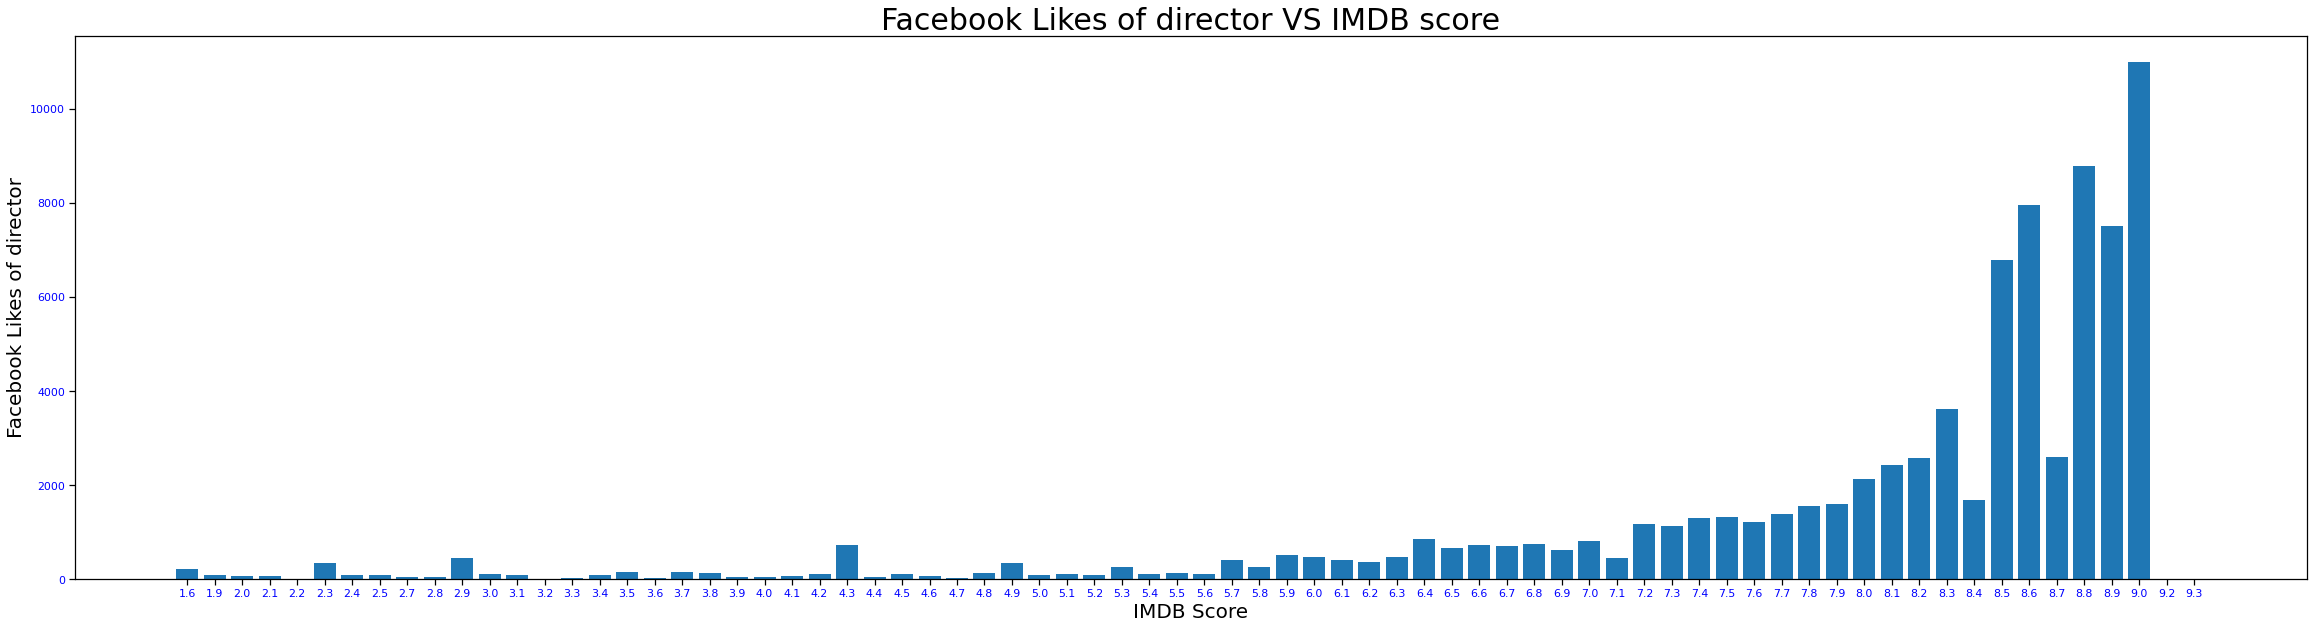

In [ ]:
#Checking the relationship between the facebook likes movies' director to the IMDB score they received


plt.figure(figsize=(40,10))

# Choose the height of the bars
height = [int(mean_likes) for mean_likes in groupby_score.director_facebook_likes]

# Choose the names of the bars
bars = (str(score) for score in groupby_score.index)
y_pos = np.arange(len(groupby_score.index))
 
# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Facebook Likes of director VS IMDB score', fontdict = {'fontsize' : 30})
plt.xlabel('IMDB Score', fontdict = {'fontsize' : 20})
plt.ylabel('Facebook Likes of director', fontdict = {'fontsize' : 20})


# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()

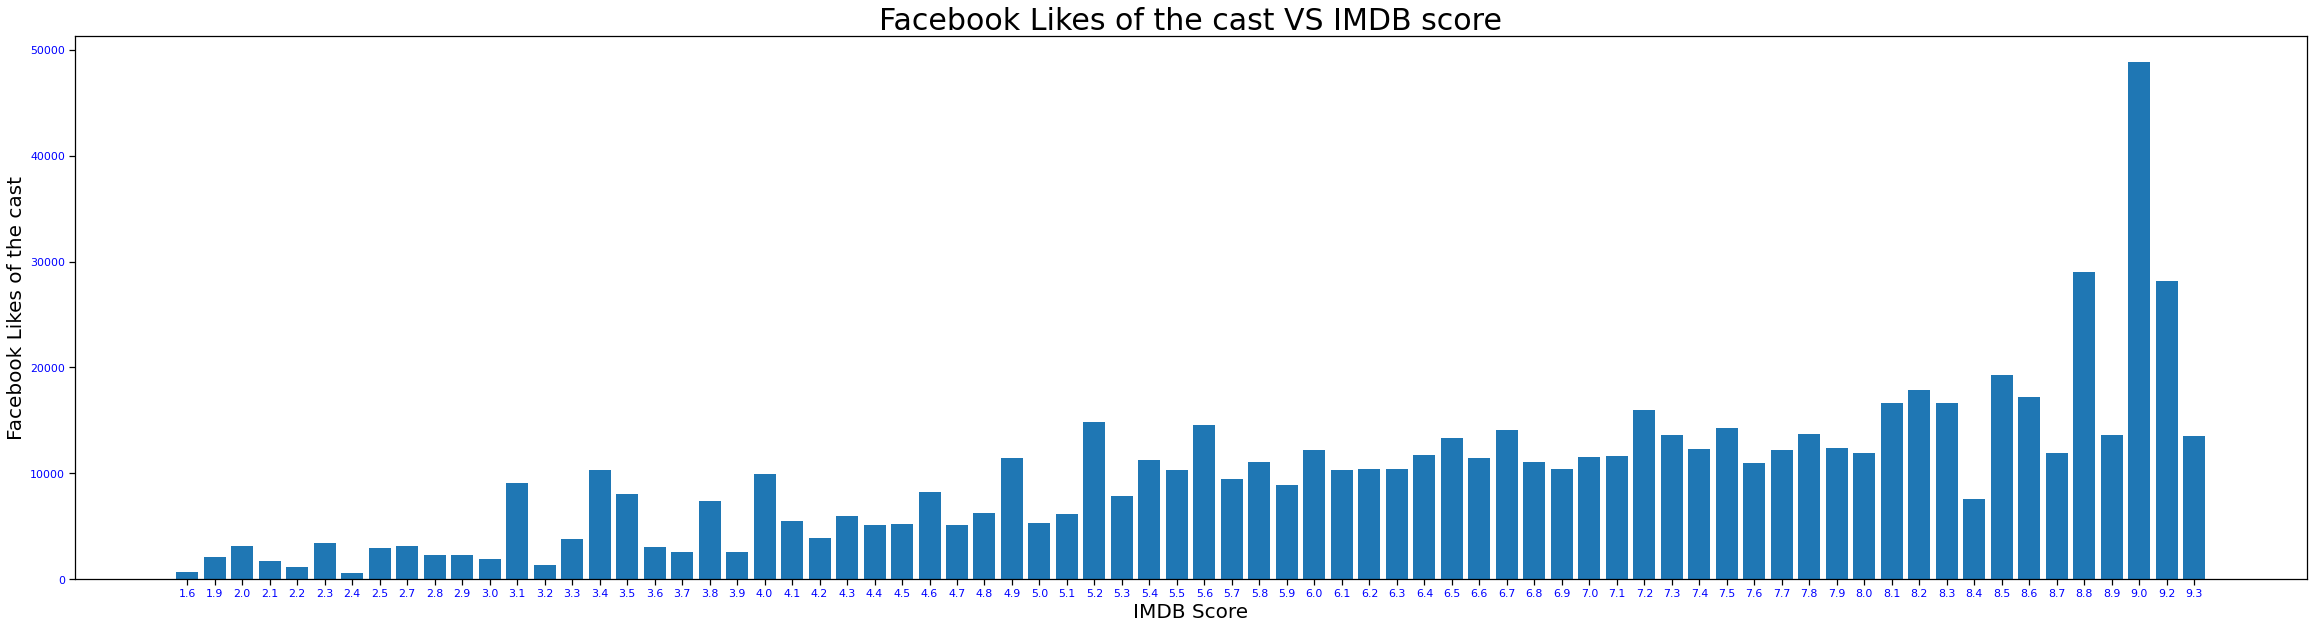

In [ ]:


plt.figure(figsize=(40,10))

# Choose the height of the bars
height = [int(mean_likes) for mean_likes in groupby_score.cast_total_facebook_likes]

# Choose the names of the bars
bars = (str(score) for score in groupby_score.index)
y_pos = np.arange(len(groupby_score.index))
 
# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Facebook Likes of the cast VS IMDB score', fontdict = {'fontsize' : 30})
plt.xlabel('IMDB Score', fontdict = {'fontsize' : 20})
plt.ylabel('Facebook Likes of the cast', fontdict = {'fontsize' : 20})


# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()

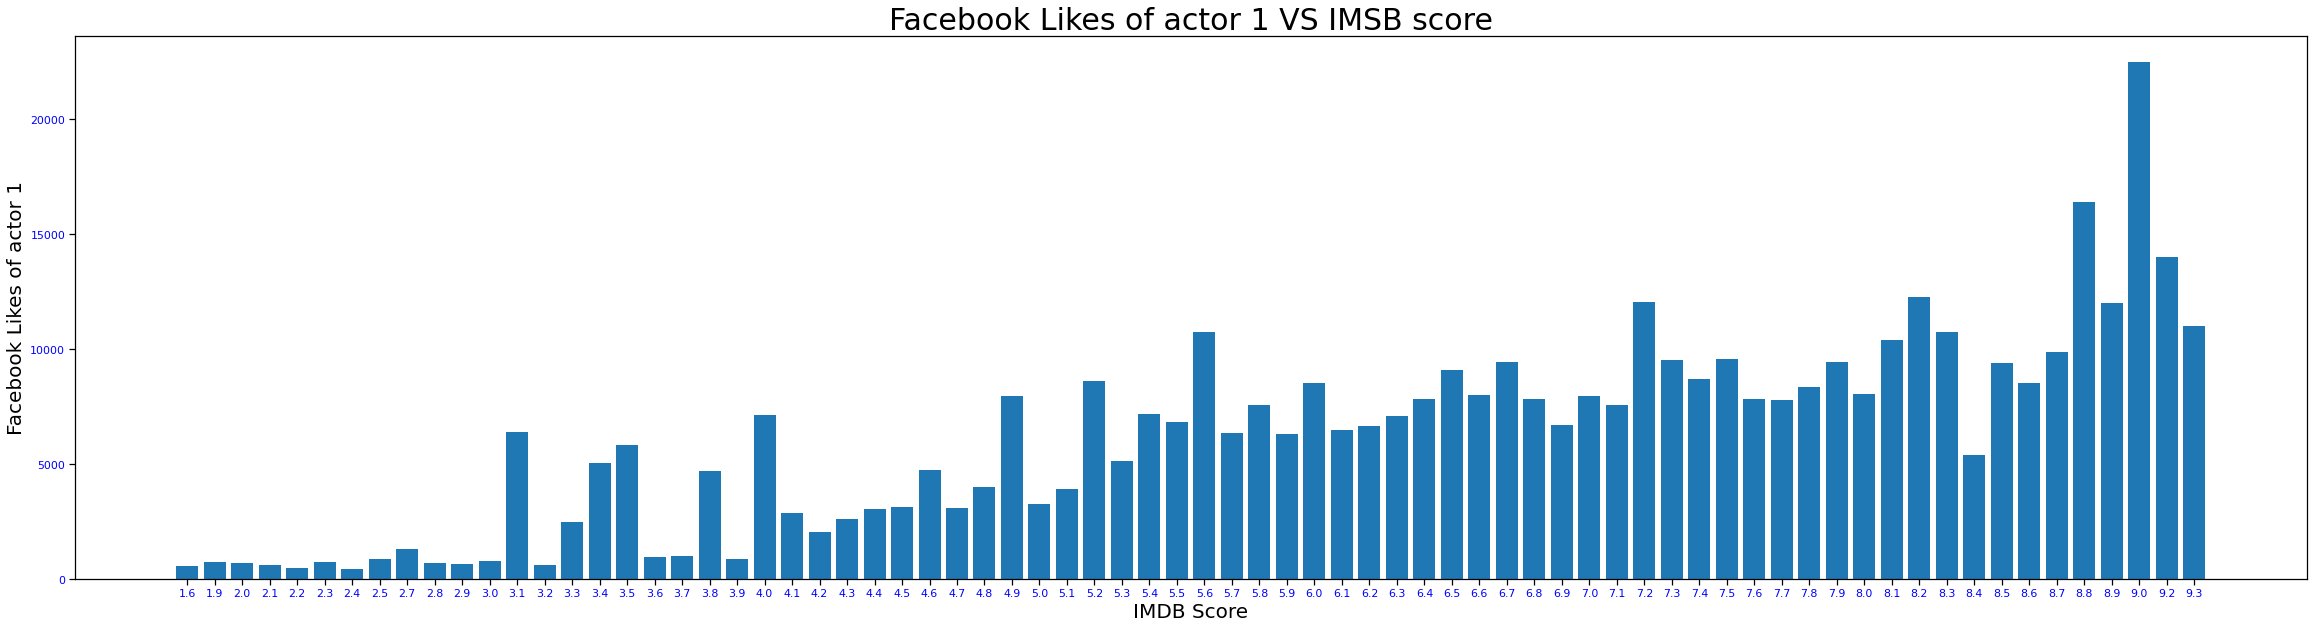

In [ ]:


plt.figure(figsize=(40,10))

# Choose the height of the bars
height = [int(mean_likes) for mean_likes in groupby_score.actor_1_facebook_likes]

# Choose the names of the bars
bars = (str(score) for score in groupby_score.index)
y_pos = np.arange(len(groupby_score.index))
 
# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Facebook Likes of actor 1 VS IMSB score', fontdict = {'fontsize' : 30})
plt.xlabel('IMDB Score', fontdict = {'fontsize' : 20})
plt.ylabel('Facebook Likes of actor 1', fontdict = {'fontsize' : 20})


# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()

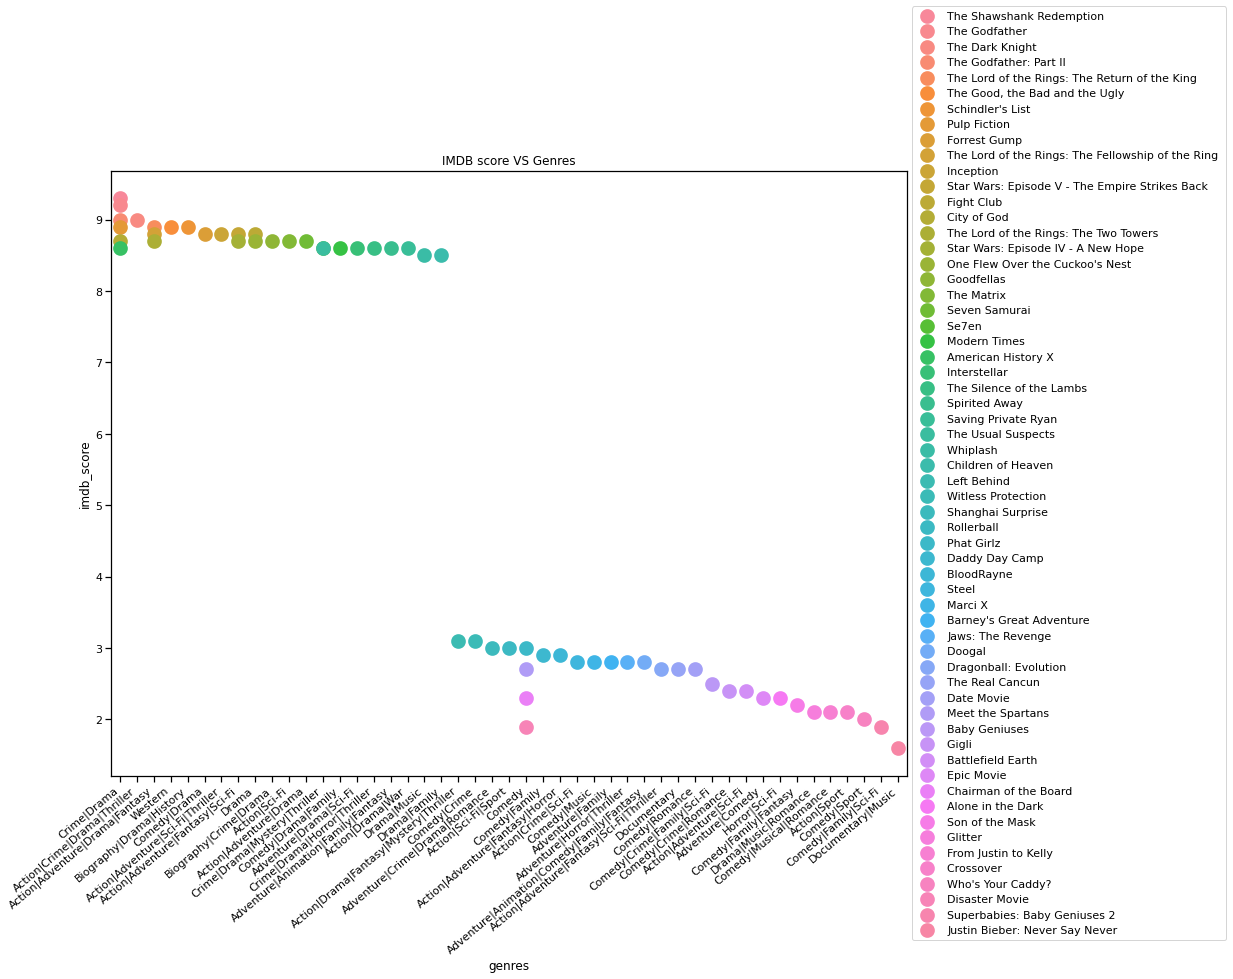

In [ ]:
#Checking the relationship between the movies' genres to the IMDB score they received 
plt.figure(figsize=(15,13))

movies= movies.sort_values(by ='imdb_score' , ascending=False)

# Take the 15 movies' genres from the top and 15 from the end with the highest and the lowest imdb score
movies_new = movies.head(30)
movies_new = movies_new.append(movies.tail(30))

ax=sns.pointplot(movies_new['genres'], movies_new['imdb_score'], hue=movies_new['movie_title'])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('IMDB score VS Genres')
plt.show()

# Preparing data for training

In [ ]:
movies.drop('director_name', axis=1, inplace=True)
movies.drop('actor_1_name',axis=1,inplace=True)
movies.drop('actor_2_name',axis=1,inplace=True)
movies.drop('actor_3_name',axis=1,inplace=True)
movies.drop('movie_title',axis=1,inplace=True)
movies.drop('plot_keywords',axis=1,inplace=True)


Remove the linear dependant variables

In [ ]:
movies.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

Remove the corelated variables

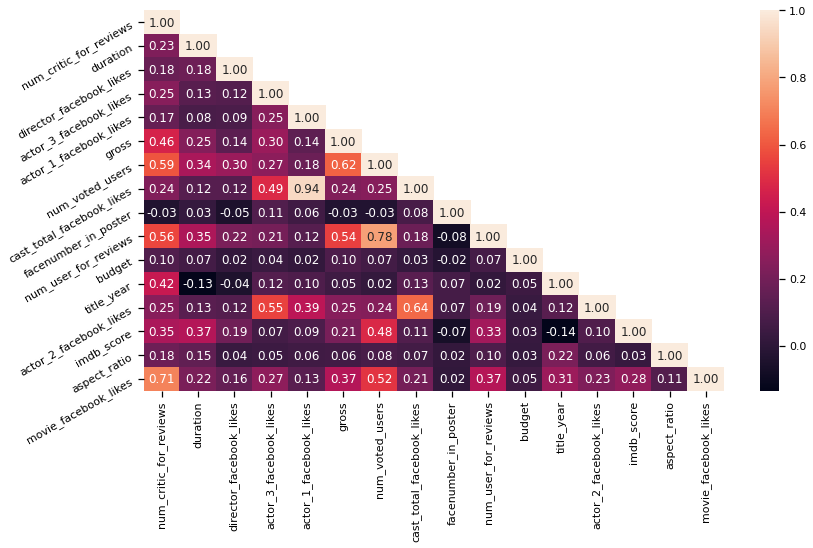

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movies.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

 We can see that the cast_total_facebook_likes and actor_1_facebook_like are highly correlated to each other. Both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [ ]:
#Adding the facebook likes of actor 2 and actor 3 together 
movies['Other_actor_facebbok_likes']=movies["actor_2_facebook_likes"] + movies['actor_3_facebook_likes']

#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 
movies.drop('actor_2_facebook_likes',axis=1,inplace=True)
movies.drop('actor_3_facebook_likes',axis=1,inplace=True)

movies.drop('cast_total_facebook_likes',axis=1,inplace=True)

#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.
movies['critic_review_ratio']=movies['num_critic_for_reviews']/movies['num_user_for_reviews']

#Dropping the num_critic_for_review
movies.drop('num_critic_for_reviews',axis=1,inplace=True)
movies.drop('num_user_for_reviews',axis=1,inplace=True)

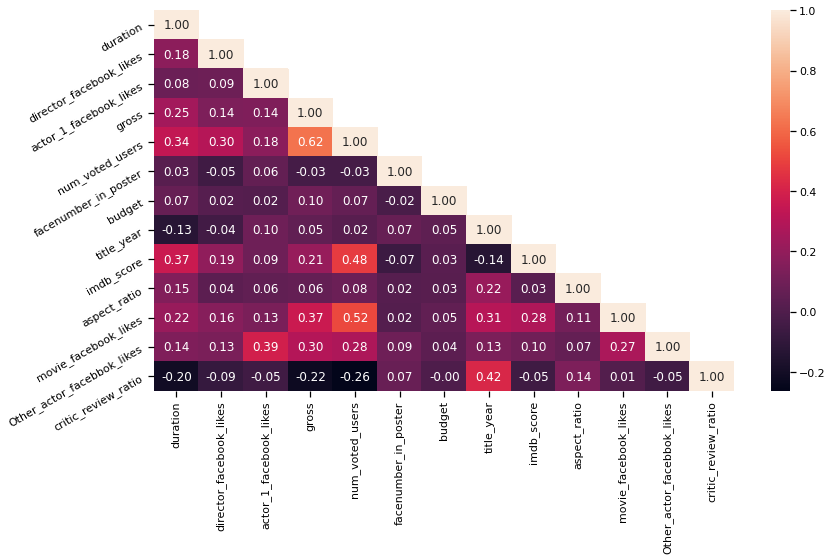

In [ ]:
# New Correlation matrix shown in the figure 

import matplotlib.pyplot as plt
import seaborn as sns
corr = movies.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## **#Dividing the genres**

In [ ]:
  
dividGenres = set()
for gnrs in set(movies['genres']):
    dividGenres.update(gnrs.split("|"))
gnrsDict = {}
for gnr in dividGenres:   
    gnrsDict[gnr] = []

In [ ]:
#running on movies' combination genres split and create dictionary with binary values 
for i in movies.index:
    gnrs = movies['genres'][i].split("|")
    for g in dividGenres:
        gnrsDict[g].append(1 if g in gnrs else 0)
        


In [ ]:
#creating genres' binary columns 
for g in dividGenres:
    movies[g] = pd.Series(gnrsDict[g], index=movies.index)
    

In [ ]:

def getGnrs(mIndx):
    d = []
    for gnr in dividGenres:
        if movies[gnr][mIndx] > 0.5:
          d.append(gnr)
    return d

In [ ]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

movies["imdb_binned_score"]=pd.cut(movies['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 

movies.drop('imdb_score',axis=1,inplace=True)

In [ ]:
# Check the percentage of every country from all the movies
movies.country.value_counts("USA")

USA               0.795049
UK                0.084642
France            0.026883
Germany           0.021294
Canada            0.015704
Australia         0.010381
Spain             0.005590
Japan             0.003993
China             0.003726
Hong Kong         0.003460
Italy             0.002928
New Zealand       0.002928
South Korea       0.002129
Denmark           0.002129
Ireland           0.001863
Mexico            0.001597
Brazil            0.001331
India             0.001331
Iran              0.001065
Norway            0.001065
Thailand          0.001065
Netherlands       0.000799
Russia            0.000799
Czech Republic    0.000799
South Africa      0.000799
Argentina         0.000799
Hungary           0.000532
Romania           0.000532
Taiwan            0.000532
Official site     0.000266
Poland            0.000266
West Germany      0.000266
Belgium           0.000266
Georgia           0.000266
New Line          0.000266
Iceland           0.000266
Finland           0.000266
C

In [ ]:
#checking the percentage of the movies that connected to each content_rating
movies.content_rating.value_counts("R" )

R            0.452489
PG-13        0.348416
PG           0.150652
G            0.023157
Not Rated    0.009050
Unrated      0.005856
Approved     0.004525
X            0.002662
NC-17        0.001597
Passed       0.000799
M            0.000532
GP           0.000266
Name: content_rating, dtype: float64

# Handling the categorical data

In [ ]:
#create binary columns
movies = pd.get_dummies(data = movies, columns = ['country'] , prefix = ['country'] , drop_first = True)
movies = pd.get_dummies(data = movies, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)


In [ ]:
movies

,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,critic_review_ratio,Musical,Drama,Fantasy,Western,Thriller,Mystery,Biography,Comedy,Music,Film-Noir,Family,Sport,Adventure,Horror,Crime,History,Romance,Animation,War,Documentary,Action,Sci-Fi,imdb_binned_score,country_Argentina,country_Aruba,country_Australia,country_Belgium,...,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,Crime|Drama,1689764,0.0,25000000.0,1994.0,1.85,108000,1206.0,0.048021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3466,175.0,0.0,14000.0,134821952.0,Crime|Drama,1155770,1.0,6000000.0,1972.0,1.85,43000,13000.0,0.092940,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
66,152.0,22000.0,23000.0,533316061.0,Action|Crime|Drama|Thriller,1676169,0.0,185000000.0,2008.0,2.35,37000,24000.0,0.138204,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,Crime|Drama,790926,1.0,13000000.0,1974.0,1.85,14000,17000.0,0.229231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
339,192.0,0.0,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,1215718,2.0,94000000.0,2003.0,2.35,16000,1273.0,0.102854,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,95.0,17.0,592.0,7009668.0,Action|Sport,8707,6.0,5600000.0,2006.0,1.85,244,633.0,0.694444,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3505,93.0,70.0,692.0,5694308.0,Comedy|Sport,13815,0.0,7000000.0,2007.0,1.85,446,1027.0,0.543478,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2268,88.0,82.0,869.0,14174654.0,Comedy,74945,0.0,25000000.0,2008.0,1.85,0,953.0,0.309192,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2295,88.0,84.0,650.0,9109322.0,Comedy|Family|Sci-Fi,25371,3.0,20000000.0,2004.0,2.35,0,561.0,0.248062,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Splitting the data into training and test data

In [ ]:
# We left only the movies that was created in USA, because most of the movies (79%) in our data are from USA
# In addition, we drop the content rating- Approved, because most of the rows was NAN

X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes',
                        'gross','num_voted_users','facenumber_in_poster','budget','title_year',
                        'aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes',
                        'critic_review_ratio','country_USA','content_rating_G',
                        'content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R',
                        'content_rating_Unrated','content_rating_X','Action', 'Adventure', 'Animation','Biography',
                        'Comedy','Crime','Documentary','Drama', 'Family', 'Fantasy', 'Film-Noir',
                        'History','Horror','Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                        'Sport', 'Thriller', 'War', 'Western'],data=movies)



y=pd.DataFrame(columns=['imdb_binned_score'],data=movies)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
X_test_to_ligistic=X_test
X_test

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,critic_review_ratio,country_USA,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1311,102.0,39.0,1000.0,6114237.0,19986,4.0,40000000.0,2001.0,1.85,892,1259.0,0.400966,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1047,112.0,109.0,779.0,56607223.0,93367,8.0,48000000.0,2001.0,2.35,0,890.0,0.207243,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3314,121.0,608.0,149.0,112935.0,8161,0.0,9000000.0,2002.0,1.85,484,69.0,0.861702,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2429,94.0,0.0,11000.0,18329466.0,279179,0.0,18000000.0,2010.0,1.85,63000,865.0,1.022727,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
249,100.0,128.0,596.0,56114221.0,110486,3.0,120000000.0,2015.0,2.35,41000,438.0,0.530935,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,126.0,0.0,19000.0,25556065.0,355126,1.0,23000000.0,2013.0,1.85,148000,233.0,0.767380,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1151,154.0,521.0,10000.0,158348400.0,88844,0.0,42000000.0,1993.0,1.85,0,1957.0,0.394366,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
315,95.0,63.0,23000.0,38120554.0,71527,0.0,140000000.0,2002.0,1.50,0,1490.0,0.585253,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2293,111.0,0.0,856.0,9525276.0,60156,0.0,20000000.0,2007.0,2.35,0,1467.0,0.555184,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
# normalize/standardize

# Feature scaling

In [ ]:
X.columns[4]

'num_voted_users'

In [ ]:
from sklearn.preprocessing import StandardScaler

#Get statistics and method for implementing the transformation about the training group and throw them on the test group
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Classification Model Selection


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

rating_decoder = {1: 'bad', 2: 'average', 3:'good', 4: 'excellent'}

# define function that build a matrix according the algorithm
def confusion_matrix(model, X_test, y_test, title):
  disp = plot_confusion_matrix(model, X_test, y_test,
                                display_labels=list(rating_decoder.values()),
                                cmap=plt.cm.Blues,
                                normalize='true')
  disp.ax_.set_title('Confusion matrix: ' + title)

acc_dict = {}

<h2># Aggregation Model </h2>

In [ ]:
gc = X.groupby(y['imdb_binned_score'])
gc.agg(['max','min'])


duration       director_facebook_likes  ... War Western    
                       max   min                     max  ... min     max min
imdb_binned_score                                         ...                
1                    156.0  76.0                   892.0  ...   0       0   0
2                    220.0  72.0                 16000.0  ...   0       1   0
3                    330.0  37.0                 23000.0  ...   0       1   0
4                    293.0  73.0                 22000.0  ...   0       1   0

[4 rows x 92 columns]

In [ ]:
#show the prediction of the algorithm
def show_prediction(true_predict, false_oredict,title):

    # width of the bars
    barWidth = 0.3

    # Choose the height of the blue bars
    bars1 = [true_predict[0], true_predict[1], true_predict[2], true_predict[3]]
    
    # Choose the height of the cyan bars
    bars2 = [false_predict[0], false_predict[1], false_predict[2], false_predict[3]]
    
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    
    # Create blue bars
    plt.bar(r1, bars1, width = barWidth, color = 'green', capsize=7, label='True predict')
    
    # Create cyan bars
    plt.bar(r2, bars2, width = barWidth, color = 'red', capsize=7, label='False predict')
    
    # general layout
    plt.xticks([r + barWidth for r in range(len(bars1))], ['Bad', 'Average', 'Good', 'Excellent'])
    plt.ylabel('Count of prediction')
    plt.title(title)
    plt.legend()
    
    # Show graphic
    plt.show()


In [ ]:
X_test

array([[-0.36361852, -0.24351286, -0.42085655, ...,  1.54964785,
        -0.20706223, -0.12740031],
       [ 0.07474633, -0.21987438, -0.43471342, ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       [ 0.4692747 , -0.05136582, -0.4742149 , ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       ...,
       [-0.67047392, -0.23540824,  0.95856029, ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       [ 0.03090984, -0.25668286, -0.42988546, ...,  1.54964785,
        -0.20706223, -0.12740031],
       [ 0.4692747 ,  5.48408981,  0.89585953, ..., -0.6453079 ,
        -0.20706223, -0.12740031]])

<h2>1. Logistic Regression </h2>

Logistic Regression Accuracy:  0.7845744680851063


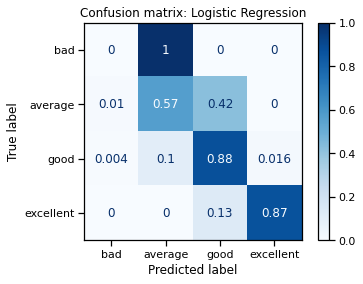

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
#for i in range(1, 30):
logit =LogisticRegression(max_iter=10000)
logit.fit(X_train,np.ravel(y_train,order='C')) #fit = It finds the coefficients for the equation specified via the algorithm being used, explain about 'C' = https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
y_pred=logit.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
LR_acc = metrics.accuracy_score(y_test, y_pred)

acc_dict['Logistic Regression'] = LR_acc

  #Predict Label - what score the algorithm give to the movie
  #True Label - the score that the movie receive 
confusion_matrix(logit, X_test, y_test, 'Logistic Regression')

print("Logistic Regression Accuracy: ",LR_acc)
  

In [ ]:
cnf_matrix #before normalization



array([[  0,   5,   0,   0],
       [  1,  55,  41,   0],
       [  1,  26, 220,   4],
       [  0,   0,   3,  20]])

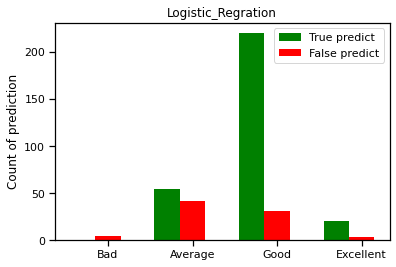

In [ ]:
true_predict = [0] *4
false_predict = [0] *4

i = 0
for m_score in y_test['imdb_binned_score']:
  if m_score == y_pred[i]:
      true_predict[(m_score) -1] += 1
  else:
      false_predict[(m_score) -1] += 1
  i += 1

show_prediction(true_predict, false_predict, 'Logistic_Regration')

In [ ]:
movies.imdb_binned_score.value_counts("1")

3    0.653181
2    0.280011
4    0.042055
1    0.024754
Name: imdb_binned_score, dtype: float64

<h2>2. KNN </h2>

KNN (K = 17) Accuracy: 0.7340425531914894:


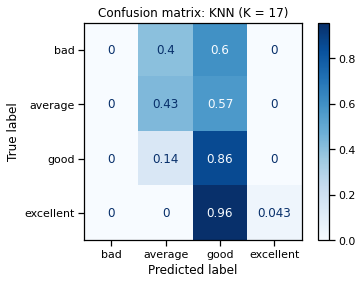

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
max_acc = 0
k = 0
best_model = None
for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, np.ravel(y_train,order='C'))
  knnpred = knn.predict(X_test)
  cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
  
  acc = metrics.accuracy_score(y_test, knnpred)
  
  if acc > max_acc:
    max_acc = acc
    k = i
    best_model = knn

knn_acc = max_acc
knn_best_k = k

acc_dict['KNN (K = {})'.format(knn_best_k)] = knn_acc

print("KNN (K = {}) Accuracy: {}:".format(knn_best_k, knn_acc))
confusion_matrix(knn, X_test, y_test, "KNN (K = {})".format(knn_best_k))

<h2>3. SVM with different kernels </h2>

SVC (kernel = linear):  0.7872340425531915
SVC (kernel = poly):  0.6941489361702128
SVC (kernel = rbf):  0.7712765957446809
SVC (kernel = sigmoid):  0.7287234042553191


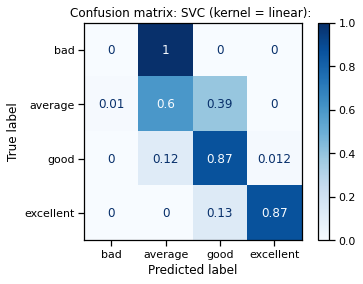

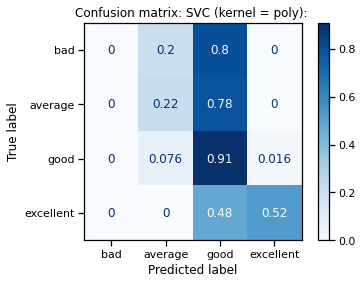

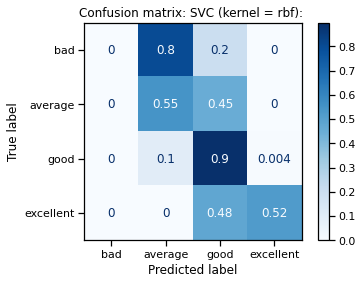

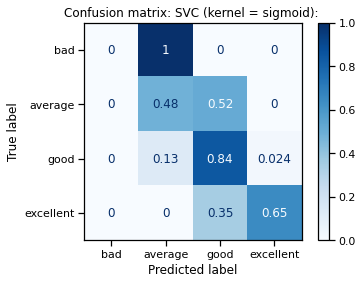

In [ ]:
#SVM
from sklearn.svm import SVC

# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    svc= SVC(kernel = kernel)

    svc.fit(X_train, np.ravel(y_train,order='C'))
    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)

    acc_dict["SVC (kernel = {})".format(kernel)] = SVC_acc
    print('SVC (kernel = {}): '.format(kernel),SVC_acc)
    title = 'SVC (kernel = {}): '.format(kernel)
    confusion_matrix(svc, X_test, y_test, title)

<h2>4. Decision Tree </h2>

Decision Tree Accuracy:  0.723404255319149


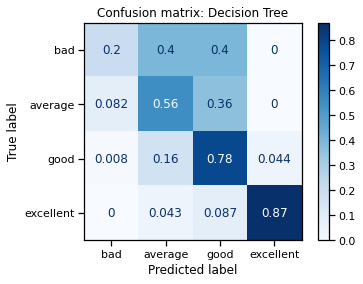

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy') #criterion = entropy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
DT_acc = metrics.accuracy_score(y_test, dtreepred)

acc_dict['Decision Tree'] = DT_acc
print("Decision Tree Accuracy: ", DT_acc)
confusion_matrix(dtree, X_test, y_test, "Decision Tree")

In [ ]:
X_test

array([[-0.36361852, -0.24351286, -0.42085655, ...,  1.54964785,
        -0.20706223, -0.12740031],
       [ 0.07474633, -0.21987438, -0.43471342, ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       [ 0.4692747 , -0.05136582, -0.4742149 , ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       ...,
       [-0.67047392, -0.23540824,  0.95856029, ..., -0.6453079 ,
        -0.20706223, -0.12740031],
       [ 0.03090984, -0.25668286, -0.42988546, ...,  1.54964785,
        -0.20706223, -0.12740031],
       [ 0.4692747 ,  5.48408981,  0.89585953, ..., -0.6453079 ,
        -0.20706223, -0.12740031]])

<h2>5. Random Forest </h2>

Random Forest Accuracy: 0.8191489361702128
Random Forest Accuracy: 0.8111702127659575
Random Forest Accuracy: 0.8138297872340425
Random Forest Accuracy: 0.8164893617021277
Random Forest Accuracy: 0.8191489361702128
Random Forest Accuracy: 0.8218085106382979
Random Forest Accuracy: 0.8138297872340425
Random Forest Accuracy: 0.8164893617021277
Random Forest Accuracy: 0.824468085106383
Random Forest Accuracy: 0.8111702127659575
Random Forest Accuracy: 0.8271276595744681
Random Forest Accuracy: 0.8191489361702128
Random Forest Accuracy: 0.8138297872340425
Random Forest Accuracy: 0.8218085106382979
Random Forest Accuracy: 0.8218085106382979
Random Forest Accuracy: 0.8218085106382979
Random Forest Accuracy: 0.8085106382978723
Random Forest Accuracy: 0.8218085106382979
Random Forest Accuracy: 0.8085106382978723
Random Forest Accuracy: 0.8138297872340425
Random Forest Accuracy: 0.8218085106382979


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8111702127659575


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8111702127659575


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8138297872340425


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8218085106382979


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8085106382978723


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8271276595744681


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8058510638297872


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8164893617021277


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random Forest Accuracy: 0.8164893617021277


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


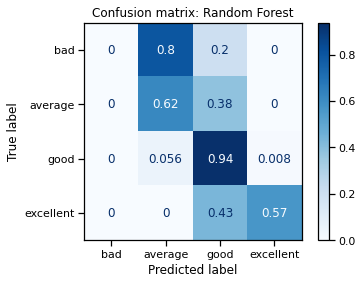

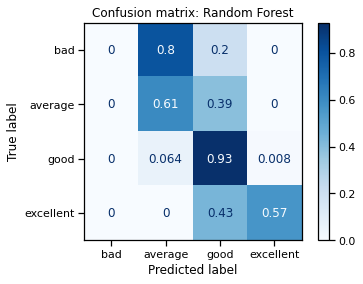

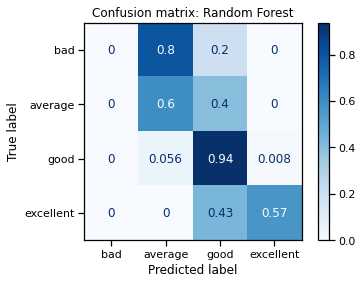

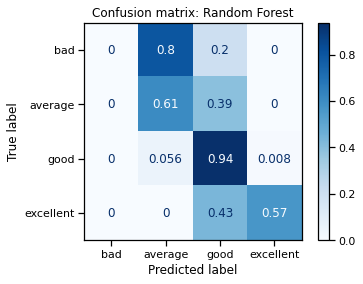

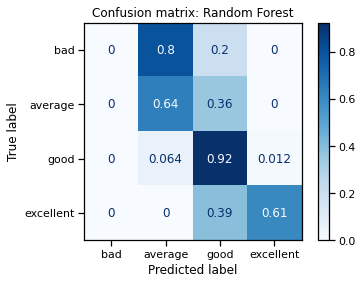

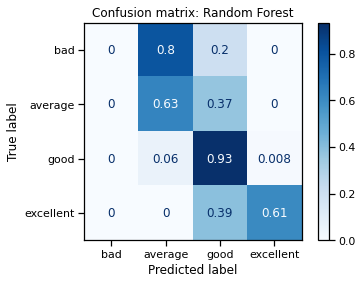

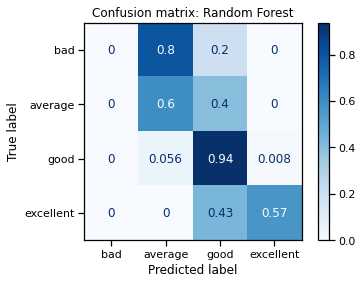

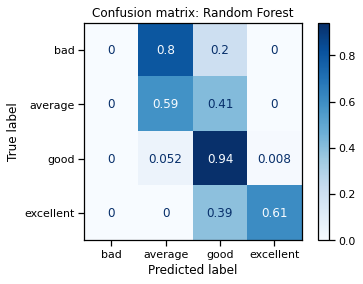

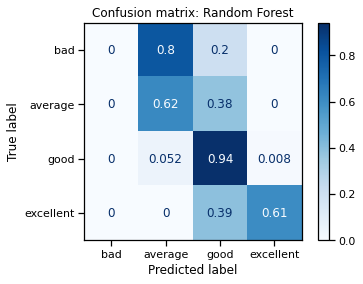

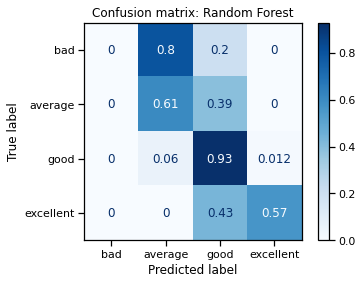

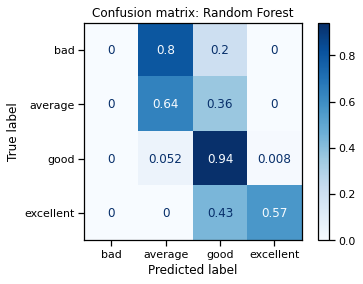

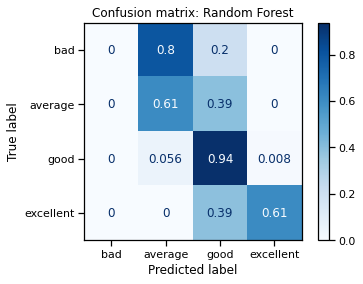

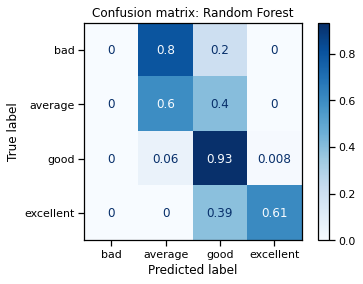

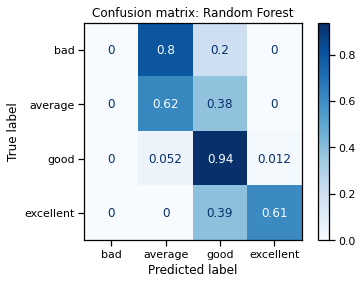

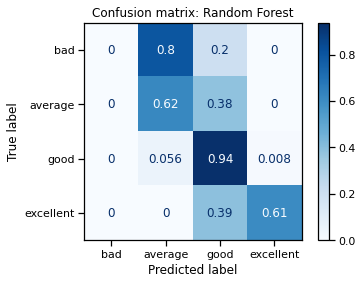

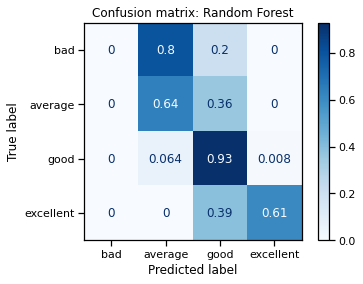

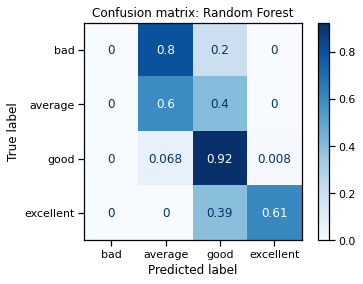

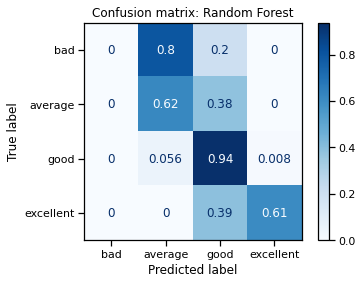

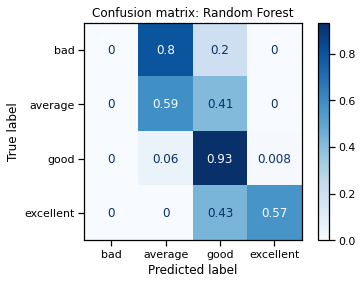

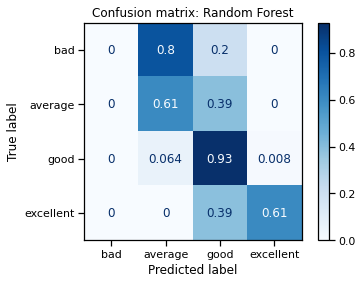

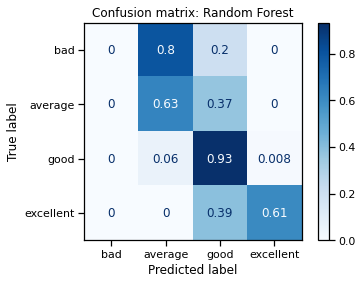

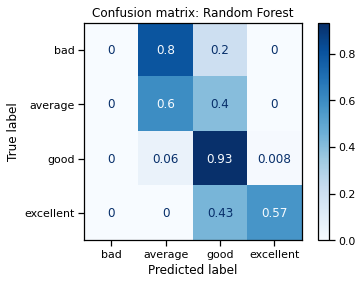

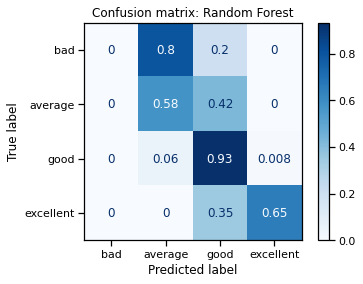

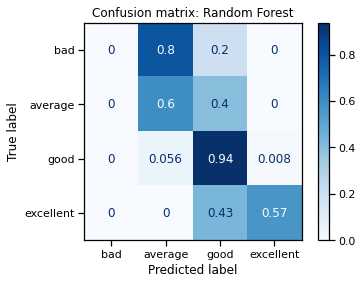

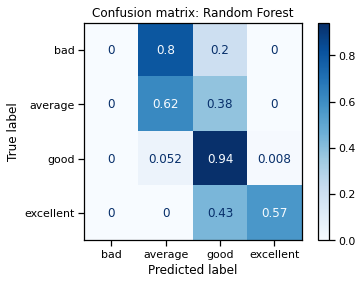

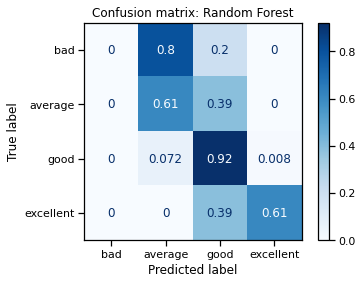

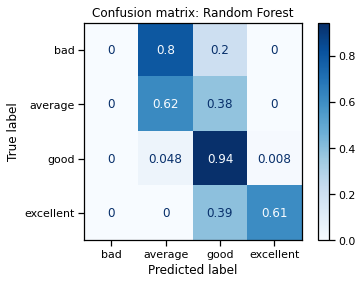

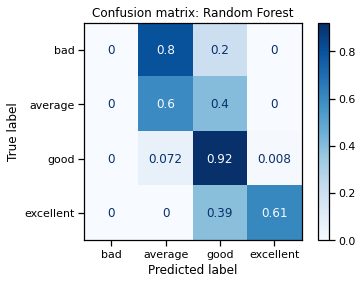

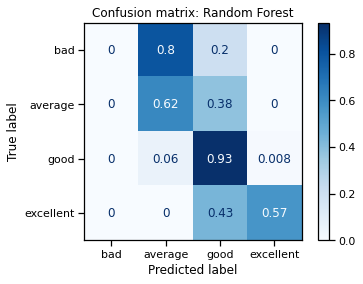

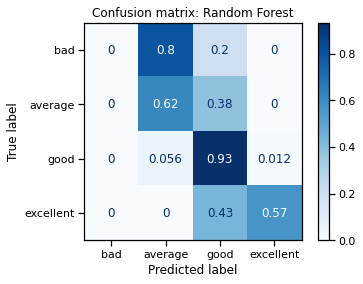

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sum_acc = 0
avg_acc = 0

for i in range(0, 30, 1):
    rfc = RandomForestClassifier(n_estimators = 350)#criterion = entropy,gini
    rfc.fit(X_train, np.ravel(y_train,order='C'))
    rfcpred = rfc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
    RF_acc = metrics.accuracy_score(y_test, rfcpred)
    sum_acc += RF_acc

    
    print("Random Forest Accuracy:", RF_acc)
    confusion_matrix(rfc, X_test, y_test, "Random Forest") 

avg_acc = sum_acc/30.0
acc_dict['Random Forest'] = avg_acc


In [ ]:
#the avg
avg_acc

0.8166666666666669

In [ ]:
len(y_test)

376

In [ ]:
i = 0
y_test_sorted = y_test.sort_index(axis = 0)
for i in range(0, len(y_test), 1):
    print("{}\t - \toriginal: {}\t predict: {} ".format(y_test_sorted.index[i] , y_test_sorted.imdb_binned_score[y_test_sorted.index[i]],rfcpred[i] ))


2	 - 	original: 3	 predict: 2 
7	 - 	original: 3	 predict: 3 
11	 - 	original: 3	 predict: 3 
26	 - 	original: 3	 predict: 3 
32	 - 	original: 3	 predict: 2 
36	 - 	original: 2	 predict: 3 
48	 - 	original: 3	 predict: 4 
52	 - 	original: 3	 predict: 3 
60	 - 	original: 2	 predict: 3 
69	 - 	original: 3	 predict: 3 
79	 - 	original: 3	 predict: 3 
81	 - 	original: 3	 predict: 2 
94	 - 	original: 3	 predict: 3 
111	 - 	original: 3	 predict: 3 
115	 - 	original: 3	 predict: 2 
144	 - 	original: 3	 predict: 3 
146	 - 	original: 3	 predict: 2 
148	 - 	original: 3	 predict: 3 
184	 - 	original: 3	 predict: 3 
187	 - 	original: 2	 predict: 3 
197	 - 	original: 2	 predict: 2 
215	 - 	original: 3	 predict: 2 
216	 - 	original: 3	 predict: 2 
220	 - 	original: 3	 predict: 3 
224	 - 	original: 2	 predict: 3 
229	 - 	original: 3	 predict: 3 
233	 - 	original: 2	 predict: 3 
249	 - 	original: 2	 predict: 3 
251	 - 	original: 3	 predict: 3 
256	 - 	original: 3	 predict: 3 
263	 - 	original: 2	 pred

## #Checking the prediction - Random Forest

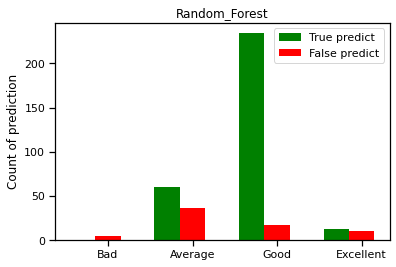

In [ ]:
true_predict = [0] *4
false_predict = [0] *4

i = 0
for m_score in y_test['imdb_binned_score']:
  if m_score == rfcpred[i]:
      true_predict[(m_score) -1] += 1
  else:
      false_predict[(m_score) -1] += 1
  i += 1

show_prediction(true_predict, false_predict, 'Random_Forest')

<h2>6. N-GRAM ( n=8 ) </h2>

Bagging classfier Accuracy: 0.773936170212766


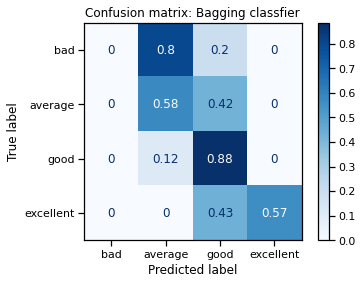

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),
                      n_estimators=8, random_state=42).fit(X_train,np.ravel(y_train,order='C'))
clfpred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, clfpred)
BC_acc = metrics.accuracy_score(y_test, clfpred)

acc_dict['Bagging classfier'] = BC_acc
print("Bagging classfier Accuracy:", BC_acc)
confusion_matrix(clf, X_test, y_test, "Bagging classfier")


#Checking the prediction - N-Gram

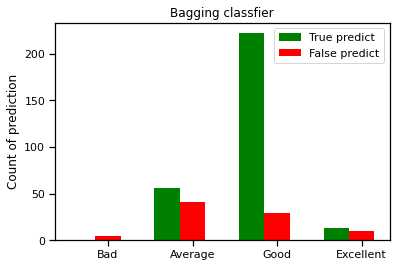

In [ ]:
true_predict = [0] *4
false_predict = [0] *4

i = 0
for m_score in y_test['imdb_binned_score']:
  if m_score == clfpred[i]:
      true_predict[(m_score) -1] += 1
  else:
      false_predict[(m_score) -1] += 1
  i += 1

show_prediction(true_predict, false_predict,'Bagging classfier')

# <h2>7. Neural Network </h2>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Activation, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, regularizers, utils
from tensorflow.keras import applications
from tensorflow.keras.losses import categorical_crossentropy,categorical_hinge,hinge,squared_hinge
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization , Input ,concatenate
from tensorflow.keras.callbacks import TensorBoard

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:


def conv_labels(arr):
  res = []
  for lbl in arr:
    tmp = [0] * 4
    tmp[int(lbl)-1] = 1
    res.append(tmp)
  return np.asarray(res)

y_test_nn = conv_labels(y_test['imdb_binned_score'])
y_train_nn = conv_labels(y_train['imdb_binned_score'])



In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
#run neural networks algorithm with different values

def checkNn(X_train, y_train_nn, X_test, y_test_nn, activation, optimizer, learning_rate):
  hiden_layer_size = int((X.shape[1] + 4)/2)#the avg of the input and the output layers

  model = Sequential()
  model.add(Dense(X.shape[1],input_dim=X.shape[1], activation=activation))
  model.add(Dropout(0.1)) #The percentage of adges that are erased and whose weight strives for 0
  model.add(Dense(hiden_layer_size, activation=activation))
  model.add(Dropout(0.1))

  model.add(Dense(4, activation='softmax'))#output layer
# SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
  if optimizer == 'Sgd':
     optimizer = tf.keras.optimizers.SGD(
      learning_rate=learning_rate, momentum=0.9, nesterov=False, name="SGD")
  
  if optimizer == 'RMSprop':
     optimizer = tf.keras.optimizers.RMSprop(
    learning_rate= learning_rate, momentum=0.9, centered=False,name="RMSprop")

  if optimizer == 'Adadelta':
     optimizer = tf.keras.optimizers.Adadelta(learning_rate= learning_rate, name="Adadelta")

  if optimizer == 'Adagrad':
     optimizer = tf.keras.optimizers.Adagrad(
         learning_rate=learning_rate, initial_accumulator_value=0.1, name="Adagrad")
  
  if optimizer == 'Adam':
     optimizer = tf.keras.optimizers.Adam(
    learning_rate= learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False, name="Adam")

  if optimizer == 'Adamax':
     optimizer = tf.keras.optimizers.Adamax(
    learning_rate= learning_rate, beta_1=0.9, beta_2=0.999, name="Adamax")

  if optimizer == 'Nadam':
     optimizer = tf.keras.optimizers.Nadam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
             
                  


  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  
  #Train the model
  history = model.fit(X_train, y_train_nn, batch_size=10, epochs=70, validation_data=(X_test, y_test_nn), verbose=0)
  return history

In [ ]:
#return the avg of the last 5 accuracy
def avg5(arr):
  return sum(x for x in arr[-5:])/5

In [ ]:
import matplotlib.pyplot as plt

def get_info(arr, act, opt):
  itms = []
  for k, v in arr.items():
    kys = k.split(' ')
    if kys[0] == act and kys[1] == opt:
      itms.append((kys[-1], v))

  itms =  sorted(itms, key=lambda x: x[0])
  x = []
  y = []
  for k, v in itms:
    x.append(avg5(v))
    y.append(k)
  return x, y


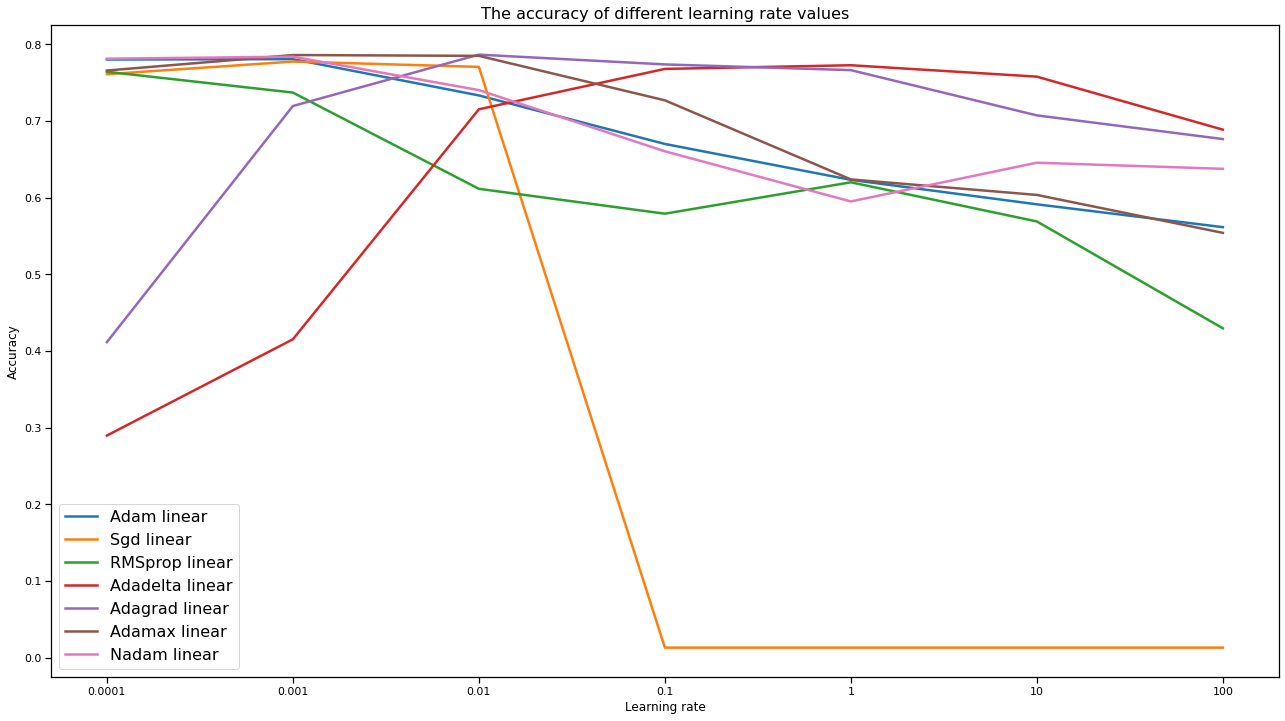

KeyboardInterrupt: ignored

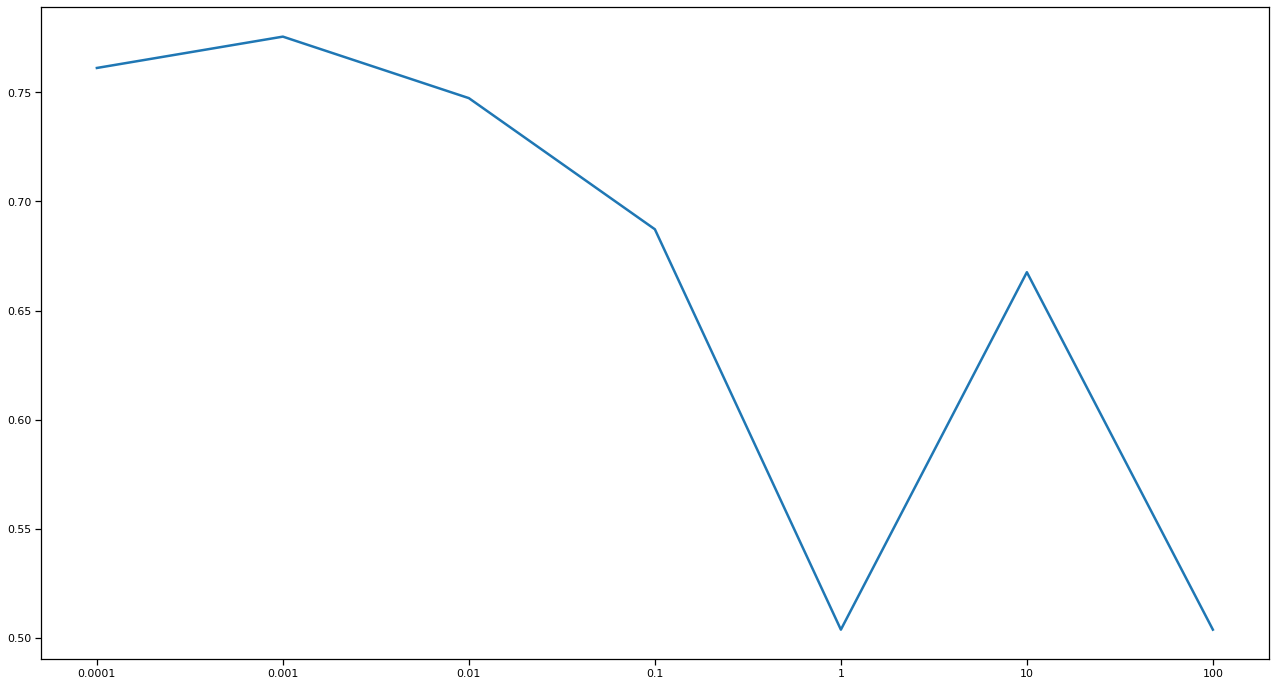

In [ ]:
nn_all_acc = {}
results = {}
for act in ('linear', 'sigmoid','hard_sigmoid', 'tanh','relu'):
  plt.subplots(figsize=(22, 12))
  for optimizer in ('Adam', 'Sgd', 'RMSprop', 'Adadelta','Adagrad','Adamax','Nadam'):
    for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
      history = checkNn(X_train, y_train_nn, X_test, y_test_nn, act, optimizer, learning_rate)
      nn_all_acc["{} {} {}".format(act, optimizer, learning_rate)] = history.history['val_accuracy']
      results["{} {} {}".format(act, optimizer, learning_rate)] = history
    x, y = get_info(nn_all_acc, act, optimizer)
    plt.plot(y, x, label="{} {}".format(optimizer, act))

  plt.legend(prop={"size": 16})
  # Add titles
  plt.title("The accuracy of different learning rate values", loc= 'center', fontsize=16, fontweight=0)
  plt.xlabel("Learning rate")
  plt.ylabel("Accuracy")

  plt.show()

In [ ]:
import operator

res = sorted(nn_all_acc.items(), key=lambda x: avg5(x[1]), reverse=True)
for k, v in res:
  print("{}  {}".format(avg5(v), k))

In [ ]:

import datetime

# We took the combination with the highest accuracy (when the learnung rate is minimal)

ep = 100

nn_acc = [0]*ep
sum_acc = 0
f_acc = [0]*10

hiden_layer_size = int((X.shape[1] + 4)/2)#the avg of the input and the output layers

for i in range(0, 10, 1):

    model = Sequential()
    model.add(Dense(X.shape[1],input_dim=X.shape[1], activation= 'linear'))
    model.add(Dropout(0.1)) #The percentage of adges that are erased and whose weight strives for 0
    model.add(Dense(hiden_layer_size, activation= 'linear'))
    model.add(Dropout(0.1))

    model.add(Dense(4, activation='softmax'))#output layer

    optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    

    #Train the model
    model.summary()
    log_dir = "/content/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    history = model.fit(X_train, y_train_nn, batch_size=10, epochs=ep, validation_data=(X_test, y_test_nn), verbose=1)

    # get the final validation accuracy
    f_acc[i] = history.history['val_accuracy'][-1]
    sum_acc += f_acc[i]
    
    
  
avg_acc = sum_acc/10.0
acc_dict['Neural Network'] = avg_acc


In [ ]:
#model.evaluate(X_test, y_test_nn, verbose=0)[1]
f_acc

#Checking the prediction - Neural network

In [ ]:
def conv_nn_labels(preds):
  res = []
  for p in preds:
    res.append(max(enumerate(p), key=lambda x: x[1])[0] + 1)
  return res

y_testing_pred = conv_nn_labels(model.predict(X_test))
y_test_original = conv_nn_labels(y_test_nn)

In [ ]:
acc = model.evaluate(X_test, y_test_nn, verbose=0)[1]

true_predict = [0] *4
false_predict = [0] *4

i = 0
for m_score in y_test['imdb_binned_score']:
  if m_score == y_testing_pred[i]:
      true_predict[(m_score) -1] += 1
  else:
      false_predict[(m_score) -1] += 1
  i += 1

show_prediction(true_predict, false_predict, 'Neural Network')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing_pred, y_test_original, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in rating_decoder.values()])

disp = disp.plot(cmap=plt.cm.Blues)

plt.show()


# Models Results

In [ ]:
results = sorted([(k, v) for k, v in acc_dict.items()], key= lambda x: x[1], reverse=True)


print("Models accuracy (from best to worst):\n")
for k, v in results:
  print("{} Accuracy: {}".format(k, v))

print("\n\n")

print("Best Model Accuracy\n")
best_acc = max(acc_dict.items(), key=lambda x: x[1])
print("{} Accuracy: {}".format(best_acc[0], best_acc[1]))

# Feature Extration



In [ ]:
X_train.shape

In [ ]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.display import clear_output

def selectFeature(estimator, alg):
  for i in range(45, 20, -1):
          
      selector = RFE(estimator, n_features_to_select=i, step=1, verbose=0)

      selector = selector.fit(X_train, np.ravel(y_train,order='C'))
      
      
      rfcpred = selector.predict(X_test)
      cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
      RF_acc = metrics.accuracy_score(y_test, rfcpred)
      print("Features = {}, {} Accuracy : {}".format(i, alg, RF_acc))
      
      #confusion_matrix(rfc, X_test, y_test, ) 



#Checking feature selection on SVC (linear)

In [ ]:
selectFeature(SVC(kernel = 'linear'), "SVC- linear" )

#Checking feature selection on Random Forest

In [ ]:
selectFeature(RandomForestClassifier(n_estimators = 350), "Random Forest" )

#Checking feature selection on Decision Tree

In [ ]:
selectFeature(DecisionTreeClassifier(criterion='entropy'), "Decision Tree" )

#Checking feature selection on Logistic Regression

In [ ]:
selectFeature(LogisticRegression(max_iter=10000), "Logistic Regression" )
